In [17]:
from gisco_geodata import NUTS, set_httpx_args
from eurostat import get_data_df, get_toc_df, set_requests_args
import geopandas as gpd
import matplotlib.pyplot as plt

In [18]:
set_httpx_args(verify=False)
set_requests_args(verify=False)

# Get the geometries from the gisco service.
nuts = NUTS()
level_2 = nuts.get(spatial_type='RG', nuts_level='LEVL_2')
assert isinstance(level_2, gpd.GeoDataFrame)

# Get the dataset information.
eurostat_database = get_toc_df()

/media/alex/alex/python-modules-packages-utils/gisco-geodata/venv/lib/python3.9/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ec.europa.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/media/alex/alex/python-modules-packages-utils/gisco-geodata/venv/lib/python3.9/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ec.europa.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/media/alex/alex/python-modules-packages-utils/gisco-geodata/venv/lib/python3.9/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'webgate.ec.europa.eu'. Adding certificate verification is strongly advised. Se

In [19]:
title, code = eurostat_database.loc[
    eurostat_database['title']
    == 'Unemployment by sex, age, educational attainment level and NUTS 2 region (1 000)',
    ['title', 'code'],
].iloc[0]
dataset = get_data_df(code)
assert dataset is not None

# Preprocess the dataset.
dataset = dataset.loc[
    (dataset['isced11'] == 'TOTAL') & (dataset['sex'] == 'T')
]  # total unemployment rate

/media/alex/alex/python-modules-packages-utils/gisco-geodata/venv/lib/python3.9/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ec.europa.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/media/alex/alex/python-modules-packages-utils/gisco-geodata/venv/lib/python3.9/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ec.europa.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/media/alex/alex/python-modules-packages-utils/gisco-geodata/venv/lib/python3.9/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ec.europa.eu'. Adding certificate verification is strongly advised. See: https

In [20]:
dataset.head()

,freq,isced11,sex,age,unit,geo\TIME_PERIOD,1999,2000,2001,2002,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
63274,A,TOTAL,T,Y15-24,THS_PER,AT,31.7,32.1,29.9,36.4,...,58.2,59.2,63.5,52.6,49.8,44.1,53.2,55.3,48.9,56.1
63275,A,TOTAL,T,Y15-24,THS_PER,AT1,12.9,12.9,12.5,17.1,...,32.3,31.5,34.3,28.5,28.8,25.3,26.1,31.6,27.2,30.7
63276,A,TOTAL,T,Y15-24,THS_PER,AT11,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63277,A,TOTAL,T,Y15-24,THS_PER,AT12,4.5,4.3,4.7,6.3,...,12.1,11.3,9.5,9.8,7.0,8.2,8.6,10.4,8.4,6.8
63278,A,TOTAL,T,Y15-24,THS_PER,AT13,7.1,7.7,7.0,9.5,...,18.6,19.1,22.8,16.9,20.3,16.3,16.2,19.9,17.6,22.5


In [21]:
level_2.head()

,geometry,COAST_TYPE,MOUNT_TYPE,NAME_LATN,CNTR_CODE,NUTS_ID,NUTS_NAME,LEVL_CODE,URBN_TYPE
0,"POLYGON ((16.84516 46.06971, 17.12202 45.88344...",None,None,Panonska Hrvatska,HR,HR02,Panonska Hrvatska,2,None
0,"POLYGON ((33.88602 39.04341, 33.74533 38.94543...",None,None,Ankara,TR,TR51,Ankara,2,None
0,"POLYGON ((41.30192 38.66769, 41.38055 38.49225...",None,None,"Şanlıurfa, Diyarbakır",TR,TRC2,"Şanlıurfa, Diyarbakır",2,None
0,"POLYGON ((-2.41285 43.32108, -2.15066 43.29595...",None,None,País Vasco,ES,ES21,País Vasco,2,None
0,"POLYGON ((30.35467 41.18414, 30.98206 41.0726,...",None,None,"Kocaeli, Sakarya, Düzce, Bolu, Yalova",TR,TR42,"Kocaeli, Sakarya, Düzce, Bolu, Yalova",2,None


In [22]:
# Join with the geometries.
dataset = level_2.merge(dataset, left_on='NUTS_ID', right_on=r'geo\TIME_PERIOD')
assert isinstance(dataset, gpd.GeoDataFrame)

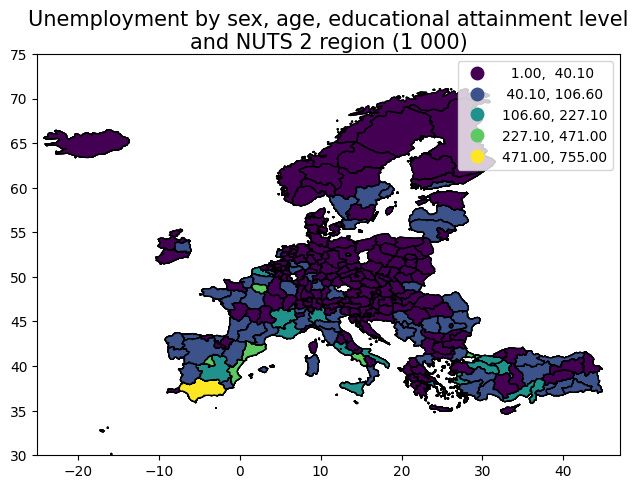

In [26]:
# Plot.
dataset.plot(
    column='2023', scheme='NaturalBreaks', legend=True, edgecolor='black'
)
plt.title(
    title, fontdict={'size': 15, 'wrap': True}
)
plt.xlim(-25, 47)
plt.ylim(30, 75)
plt.tight_layout()
plt.show()